In [139]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Connecting to database

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="my-secret-pw",
  database="droptime"
)

In [3]:
mycursor = mydb.cursor()

quering

In [79]:
query = """
SELECT *, TIMESTAMPDIFF(SECOND, segment_start_time, segment_end_time) AS time_diff_in_seconds 
FROM route_segments
ORDER BY driver_id, segment_id DESC, segment_end_time ASC
"""
df = pd.read_sql(query, mydb)

/tmp/ipykernel_1299/81233910.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


In [80]:
df

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,time_diff_in_seconds
0,4973,1,DRIVE,NaN,2024-02-18 18:22:33,2024-02-18 18:28:46,373
1,4972,1,STOP,1950.0,2024-02-18 18:31:46,2024-02-18 18:32:46,60
2,4949,1,STOP,NaN,2024-02-01 05:07:48,2024-02-01 05:19:08,680
3,4948,1,DRIVE,NaN,2024-02-01 05:15:22,2024-02-01 05:24:53,571
4,4947,1,STOP,2080.0,2024-02-01 05:27:53,2024-02-01 05:29:03,70
...,...,...,...,...,...,...,...
4986,10,4,STOP,331.0,2024-02-26 07:03:21,2024-02-26 07:06:16,175
4987,3,4,DRIVE,NaN,2024-02-24 09:15:02,2024-02-24 09:23:31,509
4988,2,4,STOP,1273.0,2024-02-24 09:26:31,2024-02-24 09:32:12,341
4989,1,4,DRIVE,NaN,2024-02-09 14:51:20,2024-02-09 14:55:42,262


In [81]:
# deleting cases when segment type is STOP and don't have order id
df = df.drop(df[(df['segment_type'] == "STOP") & (pd.isna(df['order_id']))].index)

In [82]:
df

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,time_diff_in_seconds
0,4973,1,DRIVE,NaN,2024-02-18 18:22:33,2024-02-18 18:28:46,373
1,4972,1,STOP,1950.0,2024-02-18 18:31:46,2024-02-18 18:32:46,60
3,4948,1,DRIVE,NaN,2024-02-01 05:15:22,2024-02-01 05:24:53,571
4,4947,1,STOP,2080.0,2024-02-01 05:27:53,2024-02-01 05:29:03,70
5,4928,1,DRIVE,NaN,2024-02-04 03:55:26,2024-02-04 04:02:30,424
...,...,...,...,...,...,...,...
4986,10,4,STOP,331.0,2024-02-26 07:03:21,2024-02-26 07:06:16,175
4987,3,4,DRIVE,NaN,2024-02-24 09:15:02,2024-02-24 09:23:31,509
4988,2,4,STOP,1273.0,2024-02-24 09:26:31,2024-02-24 09:32:12,341
4989,1,4,DRIVE,NaN,2024-02-09 14:51:20,2024-02-09 14:55:42,262


droping doplicates

In [83]:
df = df.drop_duplicates(subset=["driver_id", "segment_type", "order_id", "segment_start_time", "segment_end_time"], keep="last")

In [84]:
#df.to_csv("test4.csv") ################################################################################################################ tutaj zmiana

droping outliers 

In [85]:
df.sort_values(by="time_diff_in_seconds").head()

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,time_diff_in_seconds
2582,4515,3,DRIVE,NaN,2024-02-02 19:37:49,2024-02-02 19:26:28,-681
4397,2408,4,DRIVE,NaN,2024-02-09 03:23:26,2024-02-09 03:12:54,-632
1184,469,1,DRIVE,NaN,2024-02-15 20:50:10,2024-02-15 20:40:28,-582
1339,4926,2,DRIVE,NaN,2024-02-28 09:29:09,2024-02-28 09:19:44,-565
3310,1850,3,DRIVE,NaN,2024-02-14 16:34:41,2024-02-14 16:26:41,-480


In [86]:
df = df.drop(df[df["time_diff_in_seconds"] <= 0].index)

In [87]:
df.sort_values(by="time_diff_in_seconds").head()

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,time_diff_in_seconds
200,4212,1,STOP,2096.0,2024-02-22 20:16:04,2024-02-22 20:16:30,26
1137,661,1,STOP,715.0,2024-02-08 18:56:47,2024-02-08 18:57:13,26
126,4497,1,STOP,1975.0,2024-02-20 21:08:57,2024-02-20 21:09:25,28
662,2468,1,STOP,288.0,2024-02-12 15:50:59,2024-02-12 15:51:28,29
1218,362,1,STOP,1026.0,2024-02-17 18:20:56,2024-02-17 18:21:25,29


In [88]:
df.sort_values(by="time_diff_in_seconds") #.tail(50)

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,time_diff_in_seconds
200,4212,1,STOP,2096.0,2024-02-22 20:16:04,2024-02-22 20:16:30,26
1137,661,1,STOP,715.0,2024-02-08 18:56:47,2024-02-08 18:57:13,26
126,4497,1,STOP,1975.0,2024-02-20 21:08:57,2024-02-20 21:09:25,28
662,2468,1,STOP,288.0,2024-02-12 15:50:59,2024-02-12 15:51:28,29
1218,362,1,STOP,1026.0,2024-02-17 18:20:56,2024-02-17 18:21:25,29
...,...,...,...,...,...,...,...
3559,858,3,DRIVE,NaN,2024-02-20 02:33:32,2024-02-20 06:41:19,14867
1275,129,1,DRIVE,NaN,2024-02-12 20:40:07,2024-02-13 00:48:59,14932
4216,3207,4,STOP,977.0,2024-02-21 08:41:35,2024-02-21 12:50:38,14943
1219,354,1,DRIVE,NaN,2024-02-20 07:53:22,2024-02-20 12:03:41,15019


In [89]:
df = df.drop(df[df["time_diff_in_seconds"] > 1200].index)

checking if no duplicates in orders

In [90]:
counts = df['order_id'].value_counts()
for value, count in counts.items():
    if count > 1:
        print(f'Value: {value}, count: {count}')

no duplication

ploting histograms

<Axes: ylabel='Frequency'>

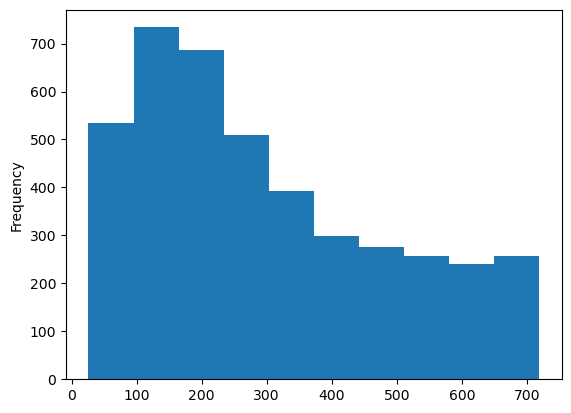

In [91]:
df["time_diff_in_seconds"].plot(kind="hist")

<Axes: ylabel='Frequency'>

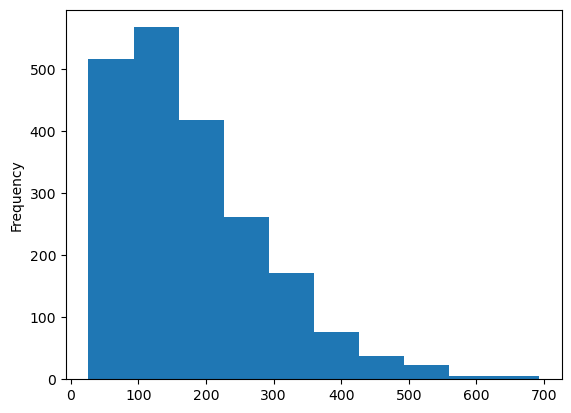

In [92]:
df[df["segment_type"] == "STOP"]["time_diff_in_seconds"].plot(kind="hist")

<Axes: ylabel='Frequency'>

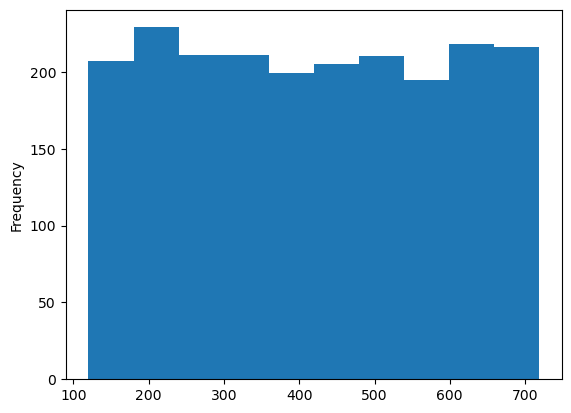

In [93]:
df[df["segment_type"] == "DRIVE"]["time_diff_in_seconds"].plot(kind="hist")

In [94]:
df

,segment_id,driver_id,segment_type,order_id,segment_start_time,segment_end_time,time_diff_in_seconds
0,4973,1,DRIVE,NaN,2024-02-18 18:22:33,2024-02-18 18:28:46,373
1,4972,1,STOP,1950.0,2024-02-18 18:31:46,2024-02-18 18:32:46,60
3,4948,1,DRIVE,NaN,2024-02-01 05:15:22,2024-02-01 05:24:53,571
4,4947,1,STOP,2080.0,2024-02-01 05:27:53,2024-02-01 05:29:03,70
5,4928,1,DRIVE,NaN,2024-02-04 03:55:26,2024-02-04 04:02:30,424
...,...,...,...,...,...,...,...
4986,10,4,STOP,331.0,2024-02-26 07:03:21,2024-02-26 07:06:16,175
4987,3,4,DRIVE,NaN,2024-02-24 09:15:02,2024-02-24 09:23:31,509
4988,2,4,STOP,1273.0,2024-02-24 09:26:31,2024-02-24 09:32:12,341
4989,1,4,DRIVE,NaN,2024-02-09 14:51:20,2024-02-09 14:55:42,262


dla każdego stopu jeżeli istnieje segment_id większe o 1 i jest to ten sam driver_id to prawie na pewno jest to jedno zamówienie
ZAKŁADAM:
czas dostarczenia przesyłki: DRIVE + STOP

In [95]:
df.reset_index(drop=True, inplace=True) # need to reindex 

In [96]:
stop_indexes = df[df["segment_type"] == "STOP"].index

In [97]:
columns_names = ["order_id", "driver_id", "operation_start_time", "operation_end_time", "drive_time", "stop_time", "total_delivery_time"]
delivery_times = pd.DataFrame(columns=columns_names)

In [98]:
for stop_index in stop_indexes:
    # help veriables
    prev_index = stop_index - 1
    cur_segment_id = df.loc[stop_index, "segment_id"]
    cur_driver_id = df.loc[stop_index, "driver_id"]

    if prev_index >= 0 and df.loc[prev_index, "segment_type"] == "DRIVE" and df.loc[prev_index, "segment_id"] == cur_segment_id + 1 and df.loc[prev_index, "driver_id"] == cur_driver_id:
        # preparing data to new record
        order_id = df.loc[stop_index, "order_id"]
        operation_start_time = df.loc[prev_index, "segment_start_time"]
        operation_end_time = df.loc[stop_index, "segment_end_time"]
        drive_time = df.loc[prev_index, "time_diff_in_seconds"]
        stop_time = df.loc[stop_index, "time_diff_in_seconds"]
        total_delivery_time = drive_time + stop_time
        
        # new record 
        new_record = {"order_id":order_id, 
                      "driver_id":cur_driver_id, 
                      "operation_start_time":operation_start_time, 
                      "operation_end_time":operation_end_time, 
                      "drive_time":drive_time, 
                      "stop_time":stop_time, 
                      "total_delivery_time":total_delivery_time}
        
        # adding new record to dataframe
        delivery_times.loc[len(delivery_times)] = new_record

In [99]:
delivery_times

,order_id,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time
0,1950.0,1,2024-02-18 18:22:33,2024-02-18 18:32:46,373,60,433
1,2080.0,1,2024-02-01 05:15:22,2024-02-01 05:29:03,571,70,641
2,1873.0,1,2024-02-04 03:55:26,2024-02-04 04:06:37,424,67,491
3,420.0,1,2024-02-13 15:21:00,2024-02-13 15:30:59,340,79,419
4,1589.0,1,2024-02-09 04:03:50,2024-02-09 04:18:53,626,97,723
...,...,...,...,...,...,...,...
1949,1817.0,4,2024-02-12 19:02:35,2024-02-12 19:14:12,234,283,517
1950,355.0,4,2024-02-18 21:04:48,2024-02-18 21:22:54,633,273,906
1951,331.0,4,2024-02-26 06:54:47,2024-02-26 07:06:16,334,175,509
1952,1273.0,4,2024-02-24 09:15:02,2024-02-24 09:32:12,509,341,850


In [103]:
df["order_id"].notna().sum() # number of posible orders from previous df 

2087

In [106]:
delivery_times.set_index("order_id", inplace=True) # changing index column to order_id

In [107]:
delivery_times

,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time
order_id,,,,,,
1950.0,1,2024-02-18 18:22:33,2024-02-18 18:32:46,373,60,433
2080.0,1,2024-02-01 05:15:22,2024-02-01 05:29:03,571,70,641
1873.0,1,2024-02-04 03:55:26,2024-02-04 04:06:37,424,67,491
420.0,1,2024-02-13 15:21:00,2024-02-13 15:30:59,340,79,419
1589.0,1,2024-02-09 04:03:50,2024-02-09 04:18:53,626,97,723
...,...,...,...,...,...,...
1817.0,4,2024-02-12 19:02:35,2024-02-12 19:14:12,234,283,517
355.0,4,2024-02-18 21:04:48,2024-02-18 21:22:54,633,273,906
331.0,4,2024-02-26 06:54:47,2024-02-26 07:06:16,334,175,509


### Generate a histogram showing the actual delivery length with 1 minute granularity
(rounded up).

In [144]:
# ading ne column (time in minutes)
delivery_times["total_delivery_time_minutes"] = delivery_times["total_delivery_time"] // 60 + 1

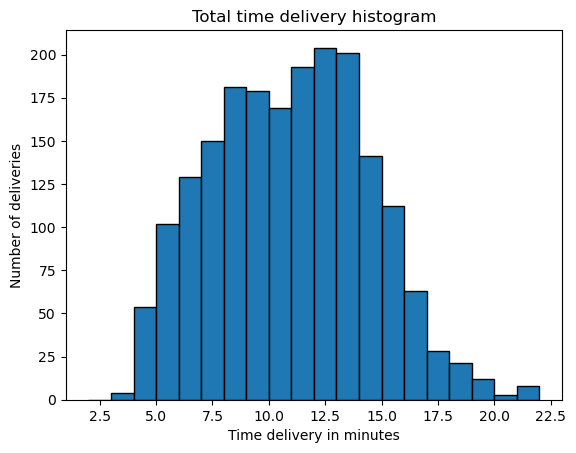

In [145]:
plt.hist(delivery_times["total_delivery_time_minutes"], bins=range(2,23), edgecolor='black')
plt.title("Total time delivery histogram")
plt.xlabel("Time delivery in minutes")
plt.ylabel("Number of deliveries")
plt.show()

In [146]:
fig = px.histogram(delivery_times, x="total_delivery_time_minutes", nbins=max(delivery_times["total_delivery_time_minutes"]), 
                   title="Total time delivery histogram", 
                   labels={"total_delivery_time_minutes": "Time delivery in minutes", "count": "Number of deliveries"})

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()


### Generate a histogram showing prediction error (difference between planned andactual delivery times).

Searching for planed delivery duration data

In [112]:
query = """
SELECT order_id, planned_delivery_duration, sector_id 
FROM orders
"""
orders_df = pd.read_sql(query, mydb)

/tmp/ipykernel_1299/2353813448.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_df = pd.read_sql(query, mydb)


In [113]:
orders_df.set_index("order_id", inplace=True)

In [114]:
orders_df

,planned_delivery_duration,sector_id
order_id,,
0,176,1
1,169,1
2,177,2
3,176,3
4,177,2
...,...,...
2235,175,3
2236,178,1
2237,177,2


In [115]:
merged_df = pd.merge(delivery_times, orders_df, left_index=True, right_index=True)

In [116]:
merged_df

,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time,planned_delivery_duration,sector_id
order_id,,,,,,,,
1950.0,1,2024-02-18 18:22:33,2024-02-18 18:32:46,373,60,433,175,1
2080.0,1,2024-02-01 05:15:22,2024-02-01 05:29:03,571,70,641,200,3
1873.0,1,2024-02-04 03:55:26,2024-02-04 04:06:37,424,67,491,176,3
420.0,1,2024-02-13 15:21:00,2024-02-13 15:30:59,340,79,419,175,2
1589.0,1,2024-02-09 04:03:50,2024-02-09 04:18:53,626,97,723,175,3
...,...,...,...,...,...,...,...,...
1817.0,4,2024-02-12 19:02:35,2024-02-12 19:14:12,234,283,517,176,3
355.0,4,2024-02-18 21:04:48,2024-02-18 21:22:54,633,273,906,175,2
331.0,4,2024-02-26 06:54:47,2024-02-26 07:06:16,334,175,509,178,3


In [147]:
merged_df["prediction_error"] = merged_df["planned_delivery_duration"] - merged_df["total_delivery_time"]

In [153]:
merged_df.sort_values(by="prediction_error")

,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time,planned_delivery_duration,sector_id,prediction_error
order_id,,,,,,,,,
127.0,4,2024-02-23 02:31:11,2024-02-23 02:55:44,602,691,1293,177,1,-1116
1783.0,4,2024-02-26 07:26:57,2024-02-26 07:51:19,620,662,1282,178,1,-1104
595.0,4,2024-02-20 02:09:53,2024-02-20 02:34:11,691,587,1278,178,1,-1100
1810.0,4,2024-02-23 03:34:51,2024-02-23 03:59:05,647,627,1274,177,1,-1097
1832.0,3,2024-02-18 01:54:10,2024-02-18 02:18:16,707,559,1266,175,1,-1091
...,...,...,...,...,...,...,...,...,...
1491.0,1,2024-02-10 04:07:57,2024-02-10 04:13:51,132,42,174,175,2,1
627.0,1,2024-02-01 09:20:05,2024-02-01 09:26:21,121,75,196,200,1,4
1201.0,1,2024-02-01 14:19:48,2024-02-01 14:26:03,158,37,195,200,2,5


In [154]:
fig = px.histogram(merged_df, x="prediction_error", nbins=max(merged_df["prediction_error"]), 
                   title="Prediction error histogram", 
                   labels={"prediction_error": "prediction error", "count": "Number of deliveries"})

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()


prediction in most cases is underestimate (aktualy delivery time is longer)

In [227]:
merged_df["prediction_error"].median()

-428.0

### We received insight from our drivers that delivering in one of the sectors issignificantly longer than in other sectors. Generate a chart to visualise this hypothesis.

In [176]:
# calculating average times in every category
avaerage_time_by_sector =  merged_df.groupby("sector_id")["total_delivery_time"].mean().reset_index()
avaerage_time_by_sector

,sector_id,total_delivery_time
0,1,652.871674
1,2,572.141494
2,3,573.807580


In [178]:
fig = px.bar(avaerage_time_by_sector, x="sector_id", y="total_delivery_time", 
                   title="Average Delivery Time by Sector Category", 
                   labels={"sector_id": "Sector Category", "total_delivery_time": "Average Delivery Time (Seconds)"})

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()


The hypothesis is confirmed. Sector 1 has, on average, longer delivery times than the other sectors. 

### Play with the data by grouping, aggregating and remodelling it. Are you able to find any correlations or trends that could be valuable for prediction quality improvement? Describe briefly your findings and visualise them on charts.

IDEAS:
* check time like day of the week, time of the day 
* check drive time and stop time 
* order quantity 
* order weight 
* driver

In [184]:
merged_df

,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time,planned_delivery_duration,sector_id,prediction_error,week_day,hour
order_id,,,,,,,,,,,
1950.0,1,2024-02-18 18:22:33,2024-02-18 18:32:46,373,60,433,175,1,-258,6,18
2080.0,1,2024-02-01 05:15:22,2024-02-01 05:29:03,571,70,641,200,3,-441,3,5
1873.0,1,2024-02-04 03:55:26,2024-02-04 04:06:37,424,67,491,176,3,-315,6,3
420.0,1,2024-02-13 15:21:00,2024-02-13 15:30:59,340,79,419,175,2,-244,1,15
1589.0,1,2024-02-09 04:03:50,2024-02-09 04:18:53,626,97,723,175,3,-548,4,4
...,...,...,...,...,...,...,...,...,...,...,...
1817.0,4,2024-02-12 19:02:35,2024-02-12 19:14:12,234,283,517,176,3,-341,0,19
355.0,4,2024-02-18 21:04:48,2024-02-18 21:22:54,633,273,906,175,2,-731,6,21
331.0,4,2024-02-26 06:54:47,2024-02-26 07:06:16,334,175,509,178,3,-331,0,6


In [181]:
merged_df['week_day'] = merged_df['operation_start_time'].dt.weekday
merged_df["hour"] = merged_df["operation_start_time"].dt.hour

In [188]:
avaerage_time_by_week_day = merged_df.groupby("week_day")["total_delivery_time"].mean().reset_index()
avaerage_time_by_week_day

,week_day,total_delivery_time
0,0,590.476190
1,1,586.390335
2,2,603.780405
3,3,577.865672
4,4,604.861702
5,5,614.942857
6,6,613.107570


In [191]:
fig = px.bar(avaerage_time_by_week_day, x="week_day", y="total_delivery_time", 
                   title="Average Delivery Time by Week Day", 
                   labels={"week_day": "Week Day", "total_delivery_time": "Average Delivery Time (Seconds)"})

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()


In [207]:
average_time_by_hour = merged_df.groupby("week_day")[["drive_time", "stop_time"]].mean().reset_index()

fig = px.bar(average_time_by_hour, x="week_day", y=["drive_time", "stop_time"], 
             title="Average Delivery Time by Week Day", 
             labels={"week_day": "Week Day", "value": "Average Delivery Time (Seconds)", "variable": "Segment Type"},
             color_discrete_map={"drive_time": "blue", "stop_time": "red"},
             barmode="group")


fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()

In [192]:
avaerage_time_by_hour = merged_df.groupby("hour")["total_delivery_time"].mean().reset_index()
avaerage_time_by_hour

,hour,total_delivery_time
0,1,736.526316
1,2,633.518248
2,3,609.169355
3,4,650.944444
4,5,614.683761
5,6,626.365854
6,7,624.659420
7,8,619.258333
8,9,588.397959
9,13,621.473684


In [193]:
fig = px.bar(avaerage_time_by_hour, x="hour", y="total_delivery_time", 
                   title="Average Delivery Time by Hour", 
                   labels={"hour": "Hour", "total_delivery_time": "Average Delivery Time (Seconds)"})

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()


two gaps, maybe a bit shorter in the afternoon/evening

In [202]:
average_time_by_hour = merged_df.groupby("hour")[["drive_time", "stop_time"]].mean().reset_index()

fig = px.bar(average_time_by_hour, x="hour", y=["drive_time", "stop_time"], 
             title="Average Delivery Time by Hour", 
             labels={"hour": "Hour", "value": "Average Delivery Time (Seconds)", "variable": "Segment Type"},
             color_discrete_map={"drive_time": "blue", "stop_time": "red"},
             barmode="group")


fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()

#### Order weight

In [208]:
query = """
SELECT o.order_id, SUM(p.weight * op.quantity) AS total_weight
FROM orders o
JOIN orders_products op ON o.order_id = op.order_id
JOIN products p ON op.product_id = p.product_id
GROUP BY o.order_id;
"""
weights_df = pd.read_sql(query, mydb)

weights_df.set_index("order_id", inplace=True)

merged_df = pd.merge(merged_df, weights_df, left_index=True, right_index=True)

merged_df

/tmp/ipykernel_1299/306588560.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time,planned_delivery_duration,sector_id,prediction_error,week_day,hour,total_weight
order_id,,,,,,,,,,,,
1950.0,1,2024-02-18 18:22:33,2024-02-18 18:32:46,373,60,433,175,1,-258,6,18,2283.0
2080.0,1,2024-02-01 05:15:22,2024-02-01 05:29:03,571,70,641,200,3,-441,3,5,7989.0
1873.0,1,2024-02-04 03:55:26,2024-02-04 04:06:37,424,67,491,176,3,-315,6,3,6827.0
420.0,1,2024-02-13 15:21:00,2024-02-13 15:30:59,340,79,419,175,2,-244,1,15,7282.0
1589.0,1,2024-02-09 04:03:50,2024-02-09 04:18:53,626,97,723,175,3,-548,4,4,12245.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1817.0,4,2024-02-12 19:02:35,2024-02-12 19:14:12,234,283,517,176,3,-341,0,19,16412.0
355.0,4,2024-02-18 21:04:48,2024-02-18 21:22:54,633,273,906,175,2,-731,6,21,8711.0
331.0,4,2024-02-26 06:54:47,2024-02-26 07:06:16,334,175,509,178,3,-331,0,6,3015.0


In [236]:
fig = px.scatter(merged_df, x='total_delivery_time', y='total_weight', 
                 labels={'total_delivery_time': 'Delivery Time', 'total_weight': 'Total Weight'},
                 title='Scatterplot: Total Weight vs. Delivery Time',
                 trendline='ols',
                 trendline_color_override='red')
fig.show()

A slight upward trend is apparent, but it is difficult to conclude that weight strongly influences the increase in delivery time.

In [235]:
fig = px.scatter(merged_df, x='stop_time', y='total_weight', 
                 labels={'stop_time': 'Delivery Stop Time', 'total_weight': 'Total Weight'},
                 title='Scatterplot: Total Weight vs. Delivery Stop Time',
                 trendline='ols',
                 trendline_color_override='red')
fig.show()

Despite the ability to unload even heavy loads quickly. Cases with longer standstill times are generally characterized by heavier loads.

In [234]:
fig = px.scatter(merged_df, x='drive_time', y='total_weight', 
                 labels={'drive_time': 'Delivery Drive Time', 'total_weight': 'Total Weight'},
                 title='Scatterplot: Total Weight vs. Delivery Drive Time',
                 trendline='ols',
                 trendline_color_override='red')
fig.show()

No relationship between driving time and load weight

#### Order quantity

In [214]:
query = """
SELECT o.order_id, SUM(op.quantity) AS total_quantity
FROM orders o
JOIN orders_products op ON o.order_id = op.order_id
GROUP BY o.order_id;
"""
quantity_df = pd.read_sql(query, mydb)

quantity_df.set_index("order_id", inplace=True)

merged_df = pd.merge(merged_df, quantity_df, left_index=True, right_index=True)

merged_df

/tmp/ipykernel_1299/3503054112.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,driver_id,operation_start_time,operation_end_time,drive_time,stop_time,total_delivery_time,planned_delivery_duration,sector_id,prediction_error,week_day,hour,total_weight,total_quantity
order_id,,,,,,,,,,,,,
1950.0,1,2024-02-18 18:22:33,2024-02-18 18:32:46,373,60,433,175,1,-258,6,18,2283.0,3.0
2080.0,1,2024-02-01 05:15:22,2024-02-01 05:29:03,571,70,641,200,3,-441,3,5,7989.0,6.0
1873.0,1,2024-02-04 03:55:26,2024-02-04 04:06:37,424,67,491,176,3,-315,6,3,6827.0,7.0
420.0,1,2024-02-13 15:21:00,2024-02-13 15:30:59,340,79,419,175,2,-244,1,15,7282.0,11.0
1589.0,1,2024-02-09 04:03:50,2024-02-09 04:18:53,626,97,723,175,3,-548,4,4,12245.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817.0,4,2024-02-12 19:02:35,2024-02-12 19:14:12,234,283,517,176,3,-341,0,19,16412.0,10.0
355.0,4,2024-02-18 21:04:48,2024-02-18 21:22:54,633,273,906,175,2,-731,6,21,8711.0,9.0
331.0,4,2024-02-26 06:54:47,2024-02-26 07:06:16,334,175,509,178,3,-331,0,6,3015.0,3.0


In [237]:
fig = px.scatter(merged_df, x='total_delivery_time', y='total_quantity', 
                 labels={'total_delivery_time': 'Delivery Time', 'total_quantity': 'Total Quantity'},
                 title='Scatterplot: Total Quantity vs. Delivery Time',
                 trendline='ols',
                 trendline_color_override='red')
fig.show()

the number of products in an order does not significantly affect the delivery time

In [238]:
fig = px.scatter(merged_df, x='stop_time', y='total_quantity', 
                 labels={'stop_time': 'Delivery Stop Time', 'total_quantity': 'Total Quantity'},
                 title='Scatterplot: Total Quantity vs. Delivery Stop Time',
                 trendline='ols',
                 trendline_color_override='red')
fig.show()

Despite the ability to quickly unload, loads with large volumes of products. Cases with longer standstill times tend to be characterized by higher quantities.

In [230]:
fig = px.scatter(merged_df, x='drive_time', y='total_quantity', 
                 labels={'drive_time': 'Delivery Drive Time', 'total_quantity': 'Total Quantity'},
                 title='Scatterplot: Total Quantity vs. Delivery Drive Time',
                 trendline='ols',
                 trendline_color_override='red')
fig.show()

The graph shows no relationship.

Driver analysis

In [222]:
avaerage_time_by_driver = merged_df.groupby("driver_id")["total_delivery_time"].mean().reset_index()
avaerage_time_by_driver

fig = px.bar(avaerage_time_by_driver, x="driver_id", y="total_delivery_time", 
                   title="Average Delivery Time by Driver", 
                   labels={"driver_id": "Driver", "total_delivery_time": "Average Delivery Time (Seconds)"})

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()

The graph shows that drivers have different average journey times. It is worth checking if anything affects this. 

In [224]:
avaerage_time_by_driver = merged_df.groupby("driver_id")[["drive_time", "stop_time"]].mean().reset_index()

fig = px.bar(avaerage_time_by_driver, x="driver_id", y=["drive_time", "stop_time"], 
             title="Average Delivery Time by Driver", 
             labels={"driver_id": "Driver", "value": "Average Delivery Time (Seconds)", "variable": "Segment Type"},
             color_discrete_map={"drive_time": "blue", "stop_time": "red"},
             barmode="group")


fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.update_layout(width=800, height=500)
fig.show()

The difference is due to stop time/unpacking time

In [232]:
fig = px.scatter(merged_df, x='stop_time', y='total_quantity', 
                 labels={'stop_time': 'Delivery Stop Time', 'total_quantity': 'Total Quantity'},
                 title='Scatterplot: Total Quantity vs. Delivery Stop Time',
                 trendline='ols',
                 trendline_color_override='red',
                 color='driver_id')  # Przypisanie kolumny driver_id do koloru punktów
fig.show()

In [233]:
fig = px.scatter(merged_df, x='stop_time', y='total_weight', 
                 labels={'stop_time': 'Delivery Stop Time', 'total_weight': 'Total Weight'},
                 title='Scatterplot: Total Weight vs. Delivery Stop Time',
                 trendline='ols',
                 trendline_color_override='red',
                 color='driver_id')
fig.show()